In [32]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [7]:
data = pd.read_csv('gbm-data.csv')
y = np.array(data.Activity)
X = np.array(data.drop('Activity', axis = 1))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=241)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241)

In [26]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def plot_loss(test_loss, train_loss):
    plt.figure()
    plt.plot(test_loss, "r", linewidth=2)
    plt.plot(train_loss, "g", linewidth=2)
    plt.legend(["test", "train"])
    plt.show()

      Iter       Train Loss   Remaining Time 
         1           1.0190           25.57s
         2           0.9192           20.77s
         3           0.8272           18.80s
         4           0.7834           19.20s
         5           0.7109           18.81s
         6           0.6368           17.64s
         7           0.5797           17.59s
         8           0.5610           18.04s
         9           0.5185           17.57s
        10           0.4984           17.21s
        20           0.1999           15.49s
        30           0.1313           15.53s
        40           0.0790           14.40s
        50           0.0511           13.44s
        60           0.0352           12.62s
        70           0.0245           11.90s
        80           0.0162           11.11s
        90           0.0114           10.38s
       100           0.0077            9.66s
       200           0.0002            3.04s


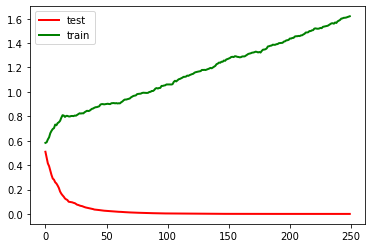

      Iter       Train Loss   Remaining Time 
         1           1.1255           13.40s
         2           1.0035           15.95s
         3           0.9386           16.01s
         4           0.8844           17.11s
         5           0.8381           17.01s
         6           0.7995           16.34s
         7           0.7559           15.86s
         8           0.7205           15.48s
         9           0.6958           15.78s
        10           0.6725           15.65s
        20           0.4672           14.11s
        30           0.3179           13.10s
        40           0.2274           12.36s
        50           0.1774           11.69s
        60           0.1394           11.16s
        70           0.1050           10.72s
        80           0.0805           10.17s
        90           0.0650            9.83s
       100           0.0511            9.23s
       200           0.0058            3.10s


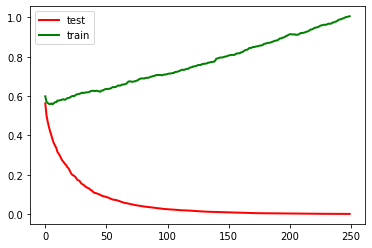

      Iter       Train Loss   Remaining Time 
         1           1.2095           15.89s
         2           1.1006           22.51s
         3           1.0240           21.35s
         4           0.9729           21.53s
         5           0.9387           20.72s
         6           0.8948           19.83s
         7           0.8621           20.46s
         8           0.8360           19.85s
         9           0.8171           19.26s
        10           0.7883           19.15s
        20           0.6029           20.79s
        30           0.4760           18.01s
        40           0.3879           16.09s
        50           0.3325           14.66s
        60           0.2759           13.52s
        70           0.2304           12.55s
        80           0.1969           11.64s
        90           0.1718           10.85s
       100           0.1404           10.06s
       200           0.0358            3.11s


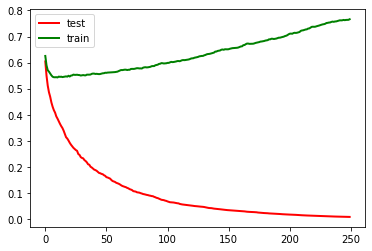

      Iter       Train Loss   Remaining Time 
         1           1.2613           22.35s
         2           1.1715           22.01s
         3           1.1009           20.94s
         4           1.0529           19.32s
         5           1.0130           17.84s
         6           0.9740           16.79s
         7           0.9475           16.31s
         8           0.9197           16.39s
         9           0.8979           16.13s
        10           0.8730           15.66s
        20           0.7207           14.18s
        30           0.6055           13.71s
        40           0.5244           13.00s
        50           0.4501           12.29s
        60           0.3908           11.63s
        70           0.3372           10.94s
        80           0.3009           10.39s
        90           0.2603            9.73s
       100           0.2327            9.12s
       200           0.0835            2.95s


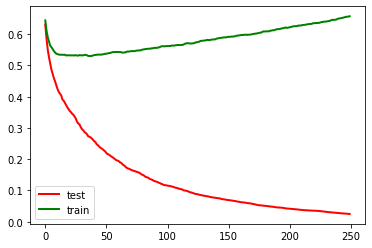

      Iter       Train Loss   Remaining Time 
         1           1.3199           16.89s
         2           1.2645           18.55s
         3           1.2170           18.07s
         4           1.1775           18.03s
         5           1.1404           17.15s
         6           1.1106           16.22s
         7           1.0844           15.93s
         8           1.0617           16.11s
         9           1.0411           15.57s
        10           1.0223           15.13s
        20           0.8864           13.49s
        30           0.7844           13.10s
        40           0.7176           12.56s
        50           0.6590           13.37s
        60           0.6120           12.78s
        70           0.5599           11.87s
        80           0.5242           11.64s
        90           0.4829           11.00s
       100           0.4473           10.25s
       200           0.2379            3.45s


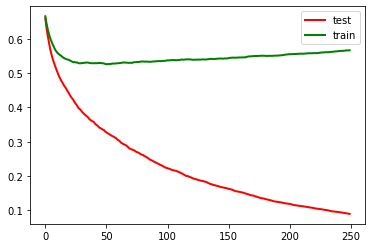

In [30]:
min_loss_res = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    clf.learning_rate = learning_rate
    clf.fit(X_train, y_train)
    train_q =  [log_loss(y_train, 1/(1+np.exp(-y_pred))) for y_pred in clf.staged_decision_function(X_train)]
    test_q =  [log_loss(y_test, 1/(1+np.exp(-y_pred))) for y_pred in clf.staged_decision_function(X_test)]
    plot_loss(train_q, test_q)
    min_loss = min(test_q)
    min_loss_index = test_q.index(min_loss) + 1
    min_loss_res[learning_rate] = min_loss, min_loss_index

In [31]:
min_loss_res

{1: (0.5822942594278475, 1),
 0.5: (0.5584259973942154, 7),
 0.3: (0.5432843873328983, 11),
 0.2: (0.5301645204906471, 37),
 0.1: (0.5259049090698129, 52)}

In [33]:
clf_rf = RandomForestClassifier(n_estimators=37, random_state=241)

In [35]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=37, random_state=241)

In [39]:
pred = clf_rf.predict_proba(X_test)

In [40]:
log_loss(y_test, pred)

0.5410941951182815